<a href="https://colab.research.google.com/github/yashveersinghsohi/face_mask_detection/blob/main/Baseline_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Packages

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2 
import os
from skimage.feature import hog
from tqdm import tqdm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Reading Datasets

In [2]:
ROOT_DIR = "/content/drive/Shareddrives/CIS522/"

with open(ROOT_DIR+"imgs.npy", "rb") as f:
  imgs = np.load(f)

with open(ROOT_DIR+"labels.npy", "rb") as f:
  labels = np.load(f)

# Hog features

In [12]:
ppcr = 8
ppcc = 8
hog_images = []
hog_features = []

for idx in tqdm(range(imgs.shape[0]), total=imgs.shape[0]):
  img = imgs[idx, :, :]
  resized = cv2.resize(img, dsize=(80, 80))
  blur = cv2.GaussianBlur(resized, (5,5), 0)
  features, hog_image = hog(
      blur, 
      orientations=8, 
      pixels_per_cell=(ppcr,ppcc),
      cells_per_block=(2,2),
      block_norm= 'L2',
      visualize=True
    )
  hog_images.append(hog_image)
  hog_features.append(features)

hog_images = np.array(hog_images)
hog_features = np.array(hog_features)

hog_images.shape, hog_features.shape

100%|██████████| 11703/11703 [03:37<00:00, 53.70it/s]


((11703, 80, 80), (11703, 2592))

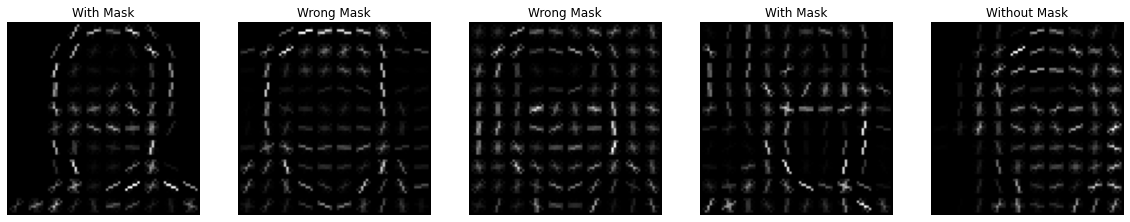

In [17]:
np.random.seed(0)
idxs = np.random.randint(low=0, high=hog_images.shape[0], size=5)

label_map = {0: "With Mask", 1: "Without Mask", 2: "Wrong Mask"}

fig, ax = plt.subplots(1, 5, figsize=(20, 5))
for idx, img_idx in enumerate(idxs):
  img = hog_images[img_idx, :, :]
  label = labels[img_idx]

  ax[idx].imshow(img, cmap="gray")
  ax[idx].axis("off")
  ax[idx].set_title(label_map[label], size=12)

plt.show()

# Baseline Model

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    hog_features, 
    labels, 
    test_size=0.1, 
    random_state=42
  )

X_train, X_val, y_train, y_val = train_test_split(
    X_train, 
    y_train, 
    test_size=0.1, 
    random_state=42
  )

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((9478, 2592), (1054, 2592), (1171, 2592), (9478,), (1054,), (1171,))

In [25]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [26]:
clf.score(X_train, y_train)

0.8822536400084406

In [27]:
clf.score(X_val, y_val)

0.8159392789373814

In [28]:
clf.score(X_test, y_test)

0.8274978650725875